# Artificial Neural Network - linear regression 

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston. 

## dataset

In [31]:
# importando bibliotecas e dataset
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv', sep=',', encoding='iso-8859-1')    
df


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [5]:
# verificando a quantidade de linhas e colunas
df.shape

(489, 4)

In [6]:
# verificando os tipos de dados
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [7]:
# verificando os valores nulos
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [9]:
# verificando dados duplicados
df.duplicated().any()

False

## pre processamento

In [4]:
# dividindo os dados em X e y (dependente e independente)
X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values

In [17]:
# dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((342, 3), (147, 3), (342,), (147,))

In [16]:
# padronizando os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_scaled = scaler.transform(y_test.reshape(-1,1)).ravel()

## treinamento

In [18]:
# criando o modelo e treinando
from sklearn.neural_network import MLPRegressor

modelo = MLPRegressor(hidden_layer_sizes=(6,6),
                     max_iter=1500, 
                     random_state=12, 
                     solver='lbfgs')

modelo_scaled = MLPRegressor(hidden_layer_sizes=(6,6),
                     max_iter=1500, 
                     random_state=12, 
                     solver='lbfgs')

modelo.fit(X_train, y_train)
modelo_scaled.fit(X_train_scaled, y_train_scaled)

MLPRegressor(hidden_layer_sizes=(6, 6), max_iter=1500, random_state=12,
             solver='lbfgs')

In [19]:
# avaliando o modelo
print(f'''
Dados não normalizados:
    treino: {modelo.score(X_train, y_train)*100.0:.2f} %
    teste: {modelo.score(X_test, y_test)*100.0:.2f} %

Dados normalizados:
    treino: {modelo_scaled.score(X_train_scaled, y_train_scaled)*100.0:.2f} %
    teste: {modelo_scaled.score(X_test_scaled, y_test_scaled)*100.0:.2f} %
''')


Dados não normalizados:
    treino: 83.25 %
    teste: 82.23 %

Dados normalizados:
    treino: 86.87 %
    teste: 83.32 %



In [20]:
# previsão
y_pred = modelo.predict(X_test)
y_pred_scaled = modelo_scaled.predict(X_test_scaled)
y_pred_scaled_inversed = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [25]:
# metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae_scaled = mean_absolute_error(y_test, y_pred_scaled_inversed)
mse_scaled = mean_squared_error(y_test, y_pred_scaled_inversed)
rmse_scaled = np.sqrt(mse_scaled)

print(
    f"""
- Dados não normalizados:
    MAE: {mae:.2f}
    MSE: {mse:.2f}
    RMSE: {rmse:.2f}

- Dados normalizados:
    MAE: {mae_scaled:.2f}
    MSE: {mse_scaled:.2f}
    RMSE: {rmse_scaled:.2f}

""")



- Dados não normalizados:
    MAE: 50729.93
    MSE: 4052914666.86
    RMSE: 63662.51

- Dados normalizados:
    MAE: 48254.22
    MSE: 3805143098.62
    RMSE: 61685.84




In [28]:
# aplicando validação cruzada
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

modelo_cross = MLPRegressor(hidden_layer_sizes=(6,6), max_iter=1500,random_state=12, solver='lbfgs')
modelo_cross_scaled = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(6, 6), max_iter=1500, random_state=12, solver='lbfgs'))

kfold = KFold(n_splits=12, shuffle=True, random_state=5)

result = cross_val_score(modelo_cross, X, y, cv=kfold)
result_scaled = cross_val_score(modelo_cross_scaled, X, y, cv=kfold)

print(f'''
Acuracia média sem normalização: {result.mean() * 100.0:.2f}%
Acuracia média com normalização: {result_scaled.mean() * 100.0:.2f}%

''')



Acuracia média sem normalização: 80.07%
Acuracia média com normalização: 82.11%




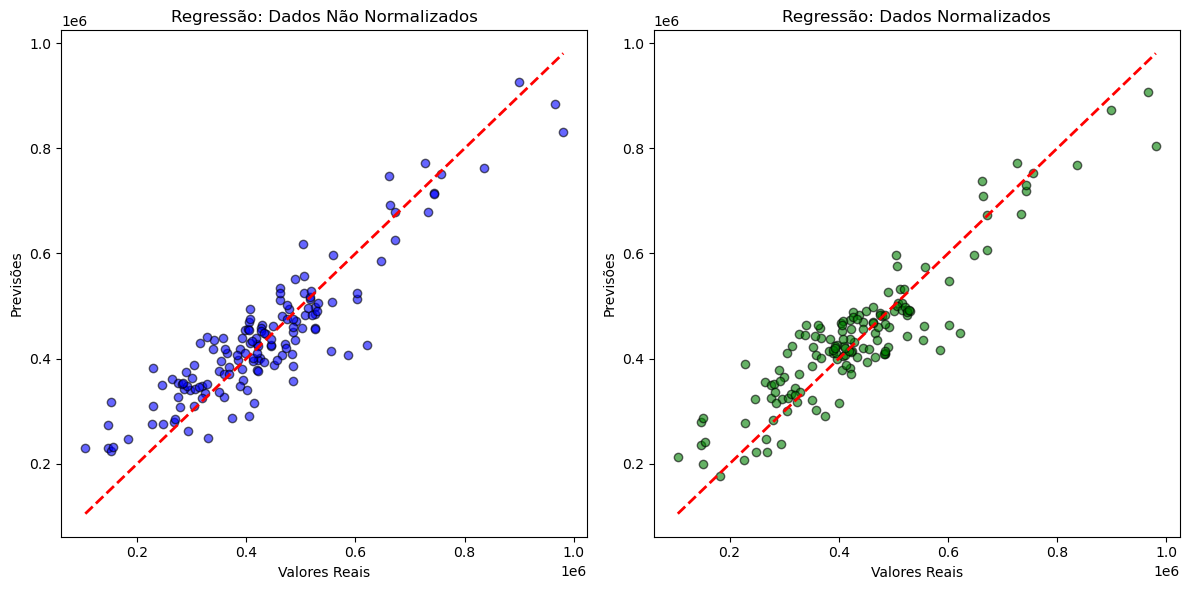

In [30]:
# graficos com os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# não normalizados
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão: Dados Não Normalizados")

# normalizados
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_scaled_inversed, alpha=0.6, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão: Dados Normalizados")

plt.tight_layout()
plt.show()
